In [220]:
# Install packages from within Jupyter
!pip install pandas matplotlib seaborn pymysql sqlalchemy mysql-connector-python openpyxl



In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql

print("All libraries imported successfully!")


All libraries imported successfully!


In [222]:
db_config = {
    "host": "localhost",
    "user": "your_username",
    "password": "your_password",
    "database": "sales",
    "port": "3306"
}

In [223]:
import os

In [224]:
output_folder=r"C:\Users\Admin\Music\1\dataset"
os.makedirs(output_folder,exist_ok=True)

In [225]:
tables=["order_detail","sku_detail","payment_detail","customer_detail"]

In [226]:

try:
    connection=pymysql.connect(**db_config)
    print("connection succesful")
    for table in tables:
        print(f"exporting table:{table}")
        query=f"SELECT * FROM {table};"
        df=pd.read_sql(query,connection)
        output_file=os.path.join(output_folder,f"{table}.csv")
        df.to_csv(output_file,index=False)
        print(f"{table} exported successfully to {output_file}")

except Exception as e:
    print(f"an error occured{e}")
finally:
    if connection:
        connection.close()
    
    

connection succesful
exporting table:order_detail


C:\Users\Admin\AppData\Local\Temp\ipykernel_15228\3434198546.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,connection)


order_detail exported successfully to C:\Users\Admin\Music\1\dataset\order_detail.csv
exporting table:sku_detail
sku_detail exported successfully to C:\Users\Admin\Music\1\dataset\sku_detail.csv
exporting table:payment_detail
payment_detail exported successfully to C:\Users\Admin\Music\1\dataset\payment_detail.csv
exporting table:customer_detail
customer_detail exported successfully to C:\Users\Admin\Music\1\dataset\customer_detail.csv


In [227]:
import pandas as pd
import os
os.chdir(r"C:\Users\Admin\Music\1\dataset")
df_od=pd.read_csv("order_detail.csv")
df_sd=pd.read_csv("sku_detail.csv")
df_pd=pd.read_csv("payment_detail.csv")
df_cd=pd.read_csv("customer_detail.csv")


In [228]:
df_sd.rename(columns={"id":"sku_id"},inplace=True)
df_pd.rename(columns={"id":"payment_id"},inplace=True)
df_cd.rename(columns={"id":"customer_id"},inplace=True)

In [229]:
df_sales=pd.DataFrame(df_pd.merge(df_od,how='inner',on='payment_id').merge(df_cd,how='left',on='customer_id').merge(df_sd,how='inner',on='sku_id'))

In [230]:
df_sales


,payment_id,payment_method,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,registered_date,sku_name,base_price,cogs,category
0,1,cod,ODR1116457650x,C517907L,2022-10-08,P320550,159500,1,"159,500",0,"159,500",1,1,1,2022-08-15,sheraton_FMOTORS_01,"159,500","97,266",Health & Sports
1,1,cod,ODR1119964698b,C225180L,2021-08-11,P523149,59856,1,"59,856",0,"59,856",1,1,1,2021-10-11,phub_Hope by Rasasi 75ml EDP,"59,856","53,824",Beauty & Grooming
2,1,cod,ODR1120310291y,C708473L,2021-09-18,P692619,34510,1,"34,510",0,"34,510",1,1,1,2021-07-02,Progressive_9781474813860,"34,510","29,290",Books
3,1,cod,ODR1120954274s,C504900L,2021-11-20,P902817,121800,1,"121,800",0,"121,800",1,1,0,2021-11-17,Aladdin_Wrench_Snap N Grip_01,"69,600","59,160",Others
4,1,cod,ODR1123439651p,C218108L,2021-06-11,P451463,98600,1,"98,600",0,"98,600",1,1,1,2021-11-08,vitamin_Vita Growth,"92,800","68,672",Health & Sports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,14,productcredit,ODR9441510071p,C886734L,2021-07-19,P174246,3770,2,"7,540",0,"7,540",1,1,1,2021-07-10,PC_SCHL-FLT-003-6-7,"3,770","2,958",School & Education
5760,15,marketingexpense,ODR7191278980n,C206125L,2021-04-10,P869132,117450,5,"587,250",0,"587,250",1,1,1,2021-08-19,yankee_5038500008357,"117,450","77,488",Home & Living
5761,16,financesettlement,ODR2855118495m,C835857L,2022-07-03,P754831,550942,26,"14,324,500",0,"14,324,500",1,1,1,2022-03-04,IDROID_BALRX7-Jet black,"550,942","429,722",Mobiles & Tablets
5762,16,financesettlement,ODR3672168278i,C249528L,2022-05-16,P368181,5046000,1,"5,046,000",0,"5,046,000",1,1,1,2022-05-15,cc_Samsung_Galaxy_S8_black,"4,872,000","3,702,720",Mobiles & Tablets


In [231]:
'''q1   top 5 Products by Sales in "Mobiles & Tablets" (2022)'''

df_sales['order_date'] = pd.to_datetime(df_sales['order_date'], errors='coerce')
top5_sales=df_sales[(df_sales["category"]=='Mobiles & Tablets')&(df_sales['is_valid']==1)& (df_sales['order_date'].dt.year ==2022)].groupby(by=['sku_name','category'])['qty_ordered'].sum()\
.reset_index(name='qty_ordered')\
.sort_values(by='qty_ordered',ascending=False)\
.head(5).reset_index(drop=True)

top5_sales

top5_sales.to_csv(os.path.join(output_folder, "top_products.csv"), index=False)


<Axes: title={'center': 'top_5products'}, xlabel='categories', ylabel='sales'>

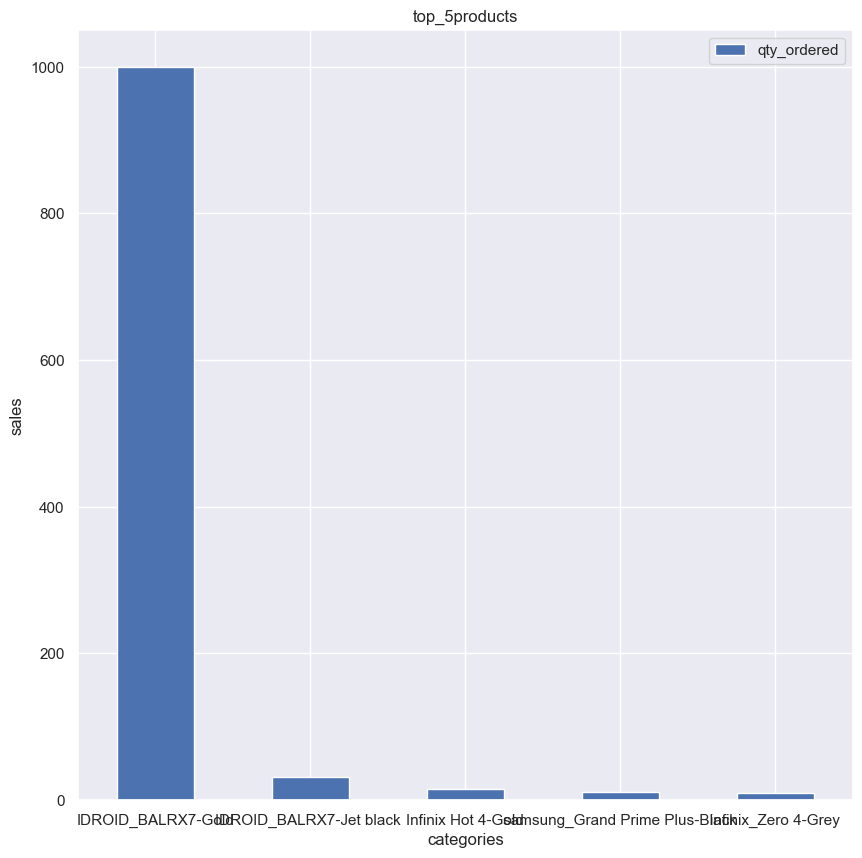

In [232]:
import seaborn as sns
sns.set()
top5_sales.plot(x="sku_name",
                y=["qty_ordered"],
                kind='bar',
                grid=True,
                xlabel="categories",
                ylabel="sales",
                figsize=(10,10),
                rot=0,
                title="top_5products",
                table=False,
                secondary_y = False)

In [233]:
sns.set()

<Axes: title={'center': 'top5_products'}, xlabel='sku_name', ylabel='sales'>

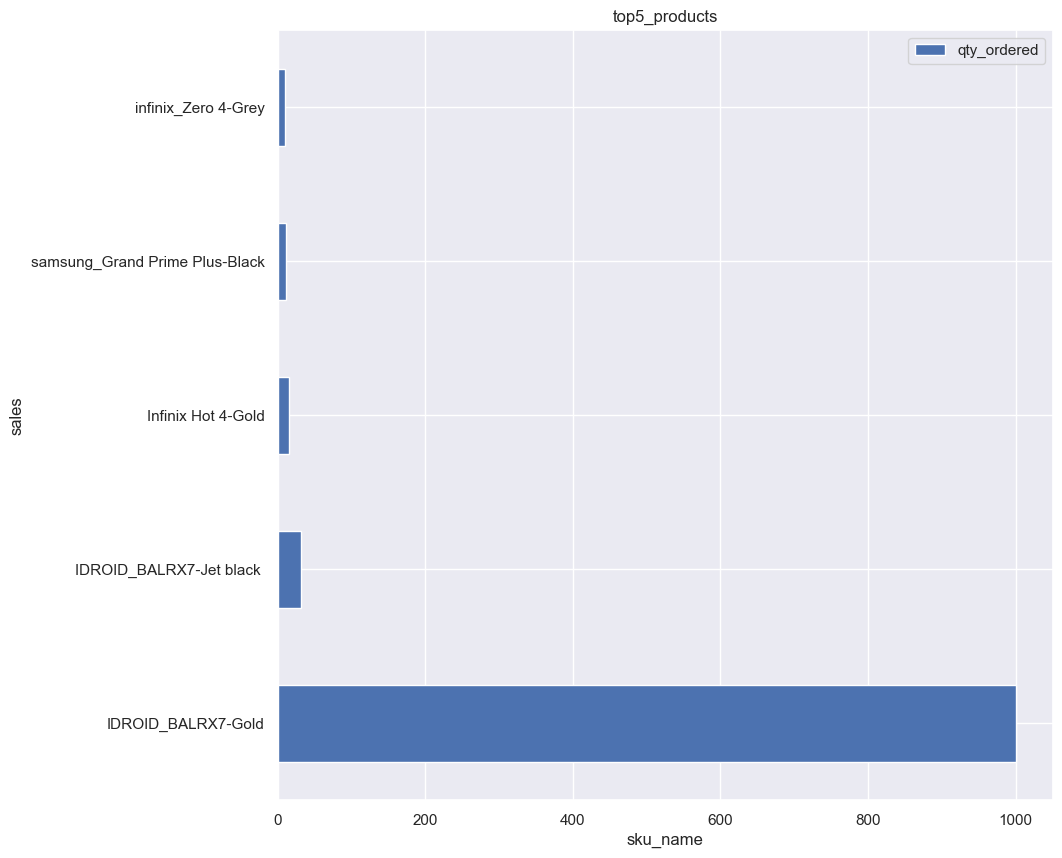

In [234]:
top5_sales.plot(x='sku_name',y='qty_ordered',kind='barh',grid=True,xlabel='sku_name',ylabel='sales',rot=0,figsize=(10,10),title='top5_products',table=False,secondary_y=False)

In [235]:

df_sales['order_date'] = pd.to_datetime(df_sales['order_date'], errors='coerce')
df_sales["category"].unique()

array(['Health & Sports', 'Beauty & Grooming', 'Books', 'Others',
       'Kids & Baby', 'Home & Living', 'Men Fashion', 'Soghaat',
       'Superstore', 'Appliances', 'Computing', 'Women Fashion',
       'School & Education', 'Entertainment', 'Mobiles & Tablets'],
      dtype=object)

In [236]:
'''q2  Sales Decrease in "Others" Category (2021 vs 2022)'''



df_sales["order_date"] = pd.to_datetime(df_sales["order_date"], errors="coerce")
def trend(x):
    if x>0:
        return 'up'
    elif x<0:
        return 'down'
    else:
        return 'fair'
    
    
df_2021 = (
    df_sales[
        (df_sales["order_date"].dt.year == 2021) &
        (df_sales["is_valid"] == 1) &
        (df_sales["category"] == "Others")
    ]
    .groupby("sku_name")[["qty_ordered", "before_discount"]]
    .sum()
    .rename(columns={
        "before_discount": "before_discount_2021",
        "qty_ordered": "qty_ordered_2021"
    })
    .reset_index()
)


df_2022 = (
    df_sales[
        (df_sales["order_date"].dt.year == 2022) &
        (df_sales["is_valid"] == 1) &
        (df_sales["category"] == "Others")
    ]
    .groupby("sku_name")[["qty_ordered", "before_discount"]]
    .sum()
    .rename(columns={
        "before_discount": "before_discount_2022",
        "qty_ordered": "qty_ordered_2022"
    })
    .reset_index()
)


df_compare = df_2021.merge(df_2022, on="sku_name", how="outer").fillna(0)


df_compare["diff_qty"] = df_compare["qty_ordered_2022"] - df_compare["qty_ordered_2021"]
df_compare["diff_amount"] = df_compare["before_discount_2022"] - df_compare["before_discount_2021"]
df_compare["trend"]=df_compare.apply(lambda row: trend(row["diff_qty"]),axis=1)


top_products_with_decrease = (
    df_compare[df_compare["diff_qty"] < 0]
    .sort_values(by="diff_qty", ascending=True).head(20)
)
output_folder=r"C:\Users\Admin\Music\1\dataset"
top_products_with_decrease.to_csv(os.path.join(output_folder, "top_products_with_decrease.csv"), index=False)

df_compare 


,sku_name,qty_ordered_2021,before_discount_2021,qty_ordered_2022,before_discount_2022,diff_qty,diff_amount,trend
0,AL Khair_Baby Oil 50ml,0,0,1,"9,570",1,"9,570",up
1,Aladdin_Wrench_Snap N Grip_01,1,"121,800",0,0,-1,"-121,800",down
2,Aladdin_bike_cover,3,"250,212",2,"68,440",-1,"-181,772",down
3,Alerashine_sku-09-XL,0,0,1,"87,000",1,"87,000",up
4,Am-PTV_ATS-004-M,5,"347,710",0,0,-5,"-347,710",down
...,...,...,...,...,...,...,...,...
157,stripyinterior_100006,1,"98,020",0,0,-1,"-98,020",down
158,sukoonbundle-sukoon10-cj_CJPOISL,0,0,1,"4,065,220",1,"4,065,220",up
159,test-product-00,0,0,1,638,1,638,up
160,tucano_IPD7AN-BK,1,"156,020",0,0,-1,"-156,020",down


In [237]:
top_products_with_decrease


,sku_name,qty_ordered_2021,before_discount_2021,qty_ordered_2022,before_discount_2022,diff_qty,diff_amount,trend
66,RB_Dettol Germ Busting Kit-bf,200,"5,220,000",40,"1,110,700",-160,"-4,109,300",down
18,Dawlance_MD 10 + DWB 600,23,"10,206,840",0,0,-23,"-10,206,840",down
80,Telemall_MM-DR-HB-L,23,"590,266",2,"52,084",-21,"-538,182",down
133,iu_Tickets General Enclosure-Islamabad,20,"116,000",0,0,-20,"-116,000",down
67,RS_Rehmat-e-Shereen Mix Mithai,13,"716,300",0,0,-13,"-716,300",down
137,kansai_NeverWet,10,"1,203,500",1,"76,850",-9,"-1,126,650",down
150,sindbad_Sindbad Gift Card-3,7,"1,015,000",0,0,-7,"-1,015,000",down
129,emart_00-1,7,"320,566",1,"39,904",-6,"-280,662",down
89,Vouch 365 2016,5,"347,768",0,0,-5,"-347,768",down
4,Am-PTV_ATS-004-M,5,"347,710",0,0,-5,"-347,710",down


In [238]:
sns.set()

<Axes: title={'center': 'sales_difference'}, xlabel='sku_name', ylabel='value_diff'>

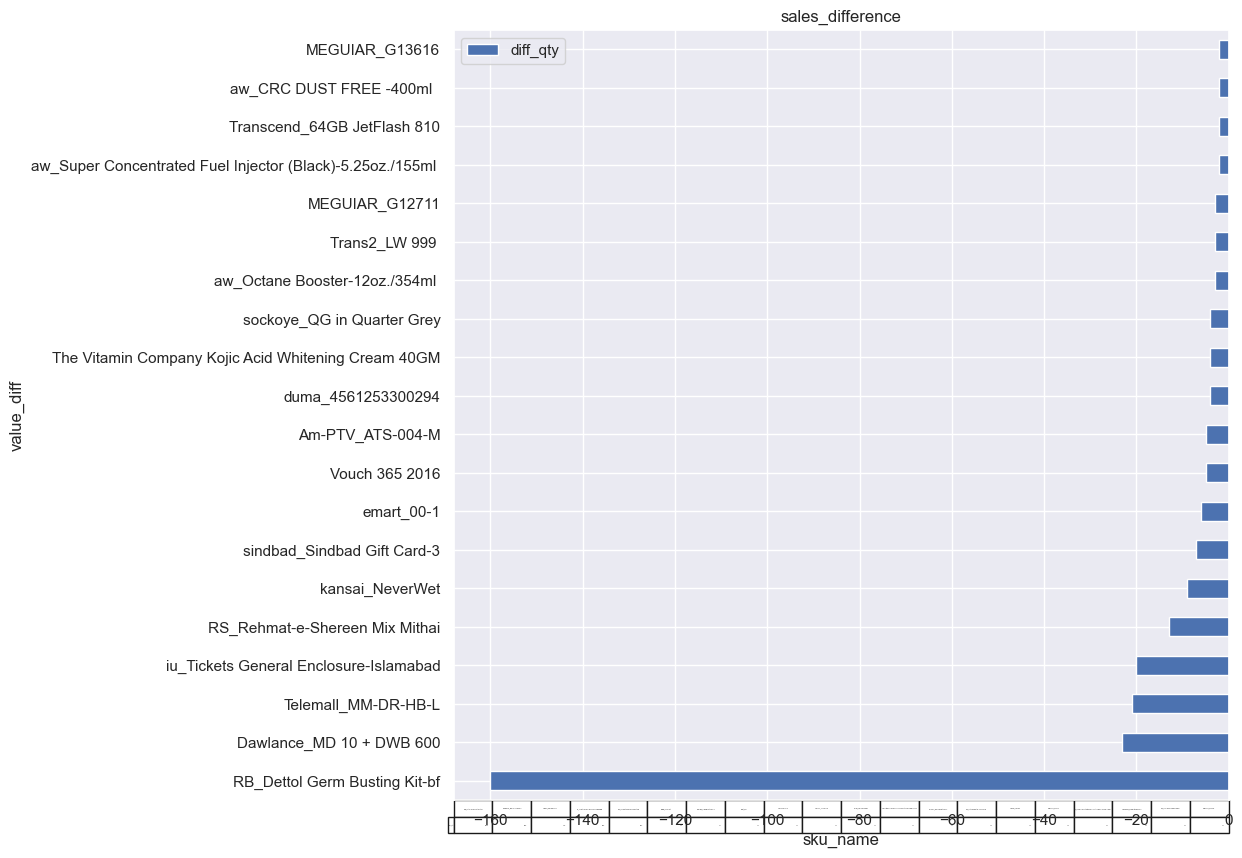

In [239]:
top_products_with_decrease.plot(x='sku_name',y=['diff_qty'],kind='barh',grid=True,xlabel='sku_name',ylabel='value_diff',figsize=(10,10),title='sales_difference',table=True,secondary_y=False)

In [240]:
'''q3 Customers Who Completed Checkout but Didn’t Pay (2022)'''

data=df_sales[(df_sales["order_date"].dt.year== 2022)&(df_sales["is_gross"]==1)&(df_sales["is_valid"]==0)&(df_sales["is_net"]==0)]
data2=data[["customer_id","registered_date"]].drop_duplicates(subset =['customer_id'])
output_folder=r"C:\Users\Admin\Music\1\dataset"
data2.to_csv(os.path.join(output_folder, "data2.csv"), index=False)
data2

,customer_id,registered_date
6,C652751L,2022-07-19
50,C527055L,2022-07-16
79,C533639L,2021-09-04
125,C998847L,2022-07-03
139,C872920L,2021-09-18
...,...,...
5748,C387663L,2022-05-02
5749,C566330L,2022-05-10
5750,C737717L,2022-03-01
5751,C862627L,2022-04-10


In [241]:
'''q4 Weekend vs Weekday Sales in Q4 2022'''

df_sales["day_name"]=df_sales["order_date"].dt.day_name()
df_sales["month_name"]=df_sales["order_date"].dt.month_name()
df_sales["weekend"]=df_sales["day_name"].isin(["Sunday","Saturday"])

data1=df_sales[(df_sales["order_date"].dt.year==2022)&(df_sales["order_date"].dt.month.isin([10,11,12]))]
data1


,payment_id,payment_method,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,...,is_valid,is_net,registered_date,sku_name,base_price,cogs,category,day_name,month_name,weekend
0,1,cod,ODR1116457650x,C517907L,2022-10-08,P320550,159500,1,"159,500",0,...,1,1,2022-08-15,sheraton_FMOTORS_01,"159,500","97,266",Health & Sports,Saturday,October,True
88,1,cod,ODR1287604410n,C986058L,2022-10-07,P303694,38512,1,"38,512",0,...,1,0,2021-09-28,stinnos_1323,"38,512","29,232",Kids & Baby,Friday,October,False
121,1,cod,ODR1363985182e,C723722L,2022-12-06,P829337,382800,1,"382,800",0,...,1,0,2022-05-03,SFEVER_GI377HB01ZASGNAFAMZ,"382,800","302,412",Beauty & Grooming,Tuesday,December,False
145,1,cod,ODR1408534634o,C901131L,2022-12-01,P512258,74530,1,"74,530",0,...,1,1,2022-01-02,alrafa_Ajwa-Dates-400g,"74,530","49,184",Soghaat,Thursday,December,False
162,1,cod,ODR1430981890i,C116160L,2022-10-05,P650191,403100,1,"403,100",0,...,0,0,2022-05-05,sanasafinaz_SS-3A,"403,100","290,232",Women Fashion,Wednesday,October,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5456,7,Easypay,ODR9422826576e,C823087L,2022-12-04,P351968,5800,12,"69,600",0,...,1,1,2022-04-26,SWP_500gm,"5,800","4,176",Superstore,Sunday,December,True
5689,11,cashatdoorstep,ODR8586137096p,C831683L,2022-10-01,P939904,2261420,1,"2,261,420",0,...,1,1,2021-07-03,Kenwood_KENWOOD E-SENSE 1.5 Ton,"2,261,420","1,605,560",Appliances,Saturday,October,True
5739,13,Easypay_MA,ODR4592275032s,C949083L,2022-11-04,P986099,110142,2,"220,284",0,...,0,0,2021-11-08,Tmall_SpyPen_8GB,"110,142","67,164",School & Education,Friday,November,False
5742,13,Easypay_MA,ODR5338082600i,C444739L,2022-10-05,P109167,120002,1,"120,002",0,...,0,0,2022-05-24,Bparcel_8460P,"120,002","85,144",Computing,Wednesday,October,False


In [245]:
pd.set_option('display.float_format', '{:,.0f}'.format)
data2=data1.groupby(["month_name","weekend"])["before_discount"].mean().reset_index()

dq41=data2[data2["month_name"]=="October"]
dq41
dq41.to_csv(os.path.join(output_folder, "dq31.csv"), index=False)
dq41

,month_name,weekend,before_discount
4,October,False,"1,149,573"
5,October,True,"997,116"


In [246]:
dq42=data2[data2["month_name"]=="November"]
dq42
dq42.to_csv(os.path.join(output_folder, "dq32.csv"), index=False)

In [247]:
dq43=data2[data2["month_name"]=="December"]
dq43
dq43.to_csv(os.path.join(output_folder, "dq33.csv"), index=False)

In [253]:
'''q5 Products with Largest Decrease in Sales (2021 vs 2022, any category)'''
df_2022=(df_sales[(df_sales["order_date"].dt.year==2022)&(df_sales["is_valid"]==1) ].rename(columns={"qty_ordered":"qty2022"}).groupby(["sku_name"])["qty2022"].sum().reset_index())



df_2021=(df_sales[(df_sales["order_date"].dt.year==2021)&(df_sales["is_valid"]==1) ].rename(columns={"qty_ordered":"qty2021"}).groupby(["sku_name"])["qty2021"].sum().reset_index())

data3=df_2021.merge(df_2022,how='inner',on='sku_name')
data3["delta"]=data3["qty2022"]-data3["qty2021"]
top_products1=data3[data3["delta"]<0].sort_values(by="delta",ascending=True).head(10)


top_products1.to_csv(r"C:\Users\Admin\Music\1\dataset\top_products1.csv", index=False)
top_products1.head(10)


,sku_name,qty2021,qty2022,delta
65,RB_Dettol Germ Busting Kit-bf,200,40,-160
66,RS_Baklawa 500gm,107,18,-89
71,RS_Soan Papri-250gm,51,7,-44
134,jn_900g,52,10,-42
96,Topline_Waheed Murad His Life and Our Times,41,10,-31
90,Telemall_MM-DR-HB-L,23,2,-21
68,RS_Kaju Barfi,29,10,-19
13,BB_bundle_bf,17,1,-16
3,Al Muhafiz Sohan Halwa Cashew,20,6,-14
67,RS_Double Delight,14,2,-12


<Axes: title={'center': 'sales_difference'}, xlabel='sku_name', ylabel='sales_dip'>

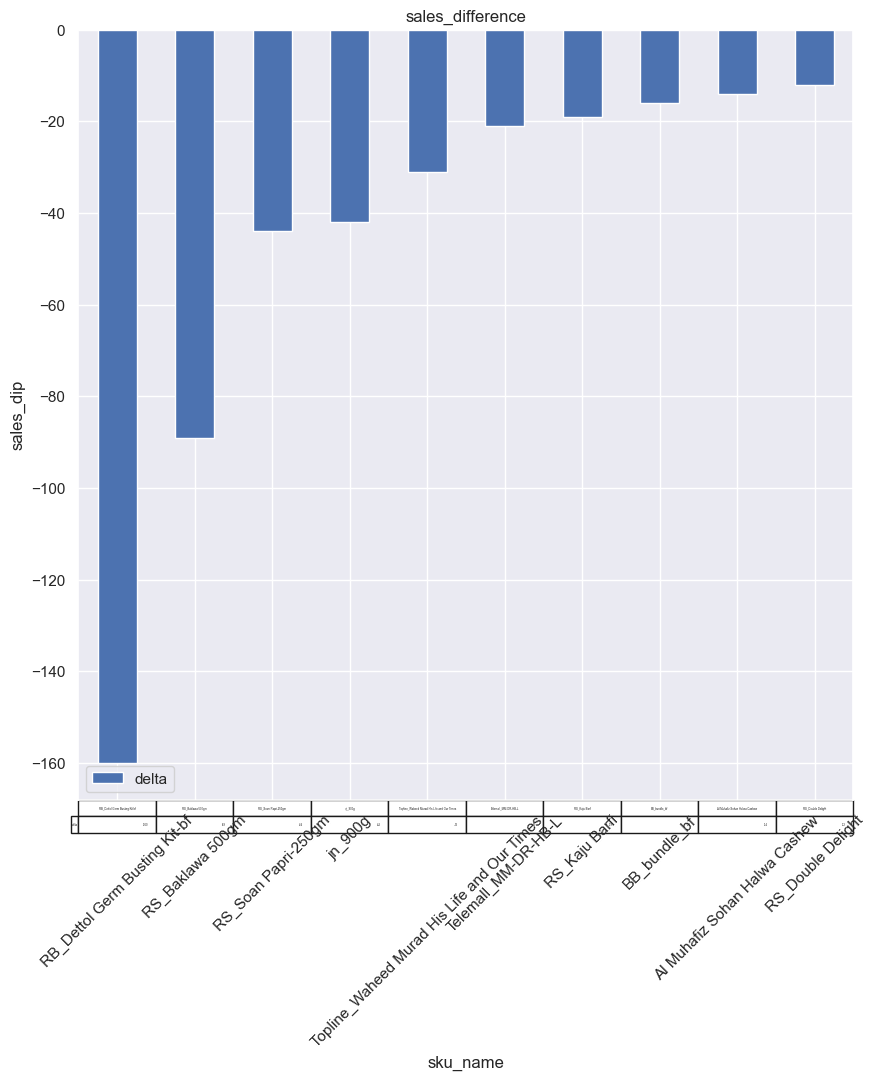

In [254]:
sns.set()

top_products1.plot(x='sku_name',y=['delta'],kind='bar',grid=True,xlabel='sku_name',ylabel='sales_dip',figsize=(10,10),title='sales_difference',rot=45,table=True,secondary_y=False)

In [256]:
'''q6 Sales Trends by Category in 2022'''

df_2022=df_sales[(df_sales["order_date"].dt.year==2022)&(df_sales["is_valid"]==1)].copy()
df_2022["month_name"]=df_sales["order_date"].dt.month_name()
category_trends=df_2022.groupby(["category","month_name"])["qty_ordered"].sum().reset_index()
category_trends.to_csv(r"C:\Users\Admin\Music\1\dataset\category_trends.csv", index=False)

month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
category_trends["month_name"] = pd.Categorical(category_trends["month_name"], 
                                               categories=month_order, 
                                               ordered=True)
category_trends=category_trends.sort_values(["month_name","category"])



C:\Users\Admin\AppData\Local\Temp\ipykernel_15228\308417700.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Category")


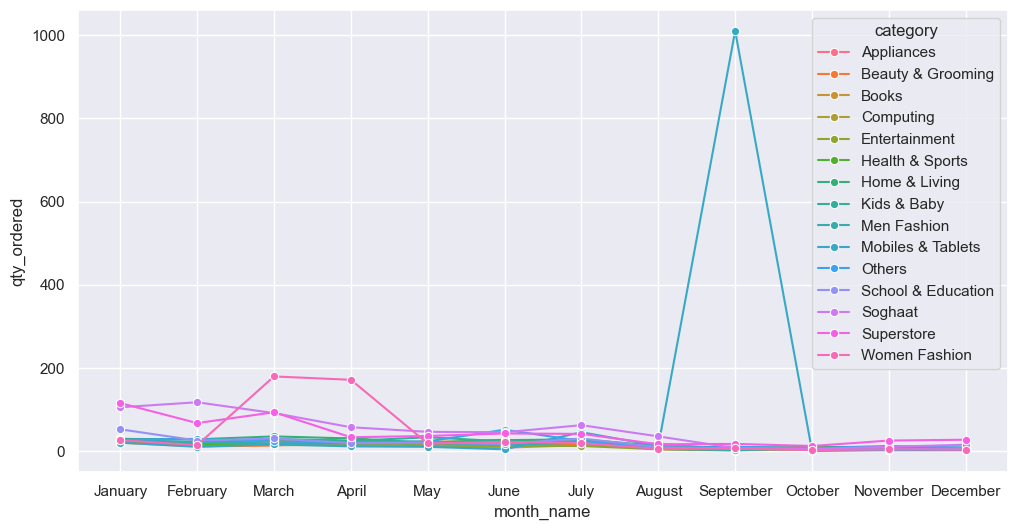

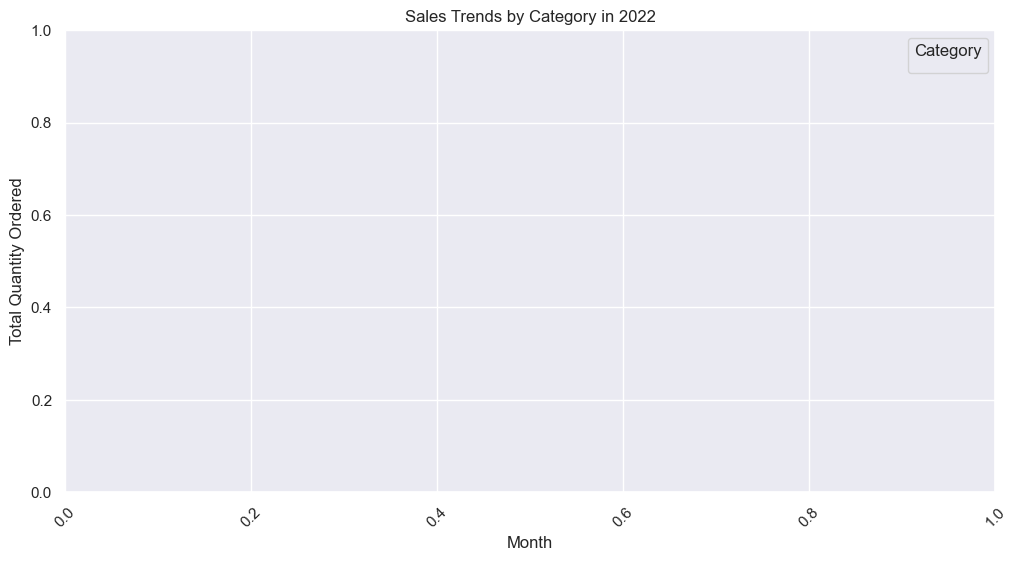

In [257]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.lineplot(data=category_trends,x='month_name',y='qty_ordered',hue='category',marker='o')
plt.figure(figsize=(12,6))
plt.title("Sales Trends by Category in 2022")
plt.xlabel("Month")
plt.ylabel("Total Quantity Ordered")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.grid(True)
plt.show()
